# Stationary Analysis

* Stationary analysis on the original sample time series.
* Stationary analysis on the more randomlized residuals.
* The purpose is to check, using original ts or residuals, which might be better for later forecasting.
  * Because residuals have quite different value scale as the original data, later when experimenting with different forecasting methods, either to use residuals, or to use original ts (including processed original ts).

In [6]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

In [24]:
def test_stationarity(timeseries, subtitle):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()
    rolcov = timeseries.rolling(window=12,center=False).cov()

    # Plot rolling statistics:
    plt.figure(figsize=(9,7))
    orig = plt.plot(timeseries, color='blue',label='Raw ts')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='purple', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation - '+subtitle)
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Results of Augmented Dickey-Fuller (ADF) Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    print()
    
    # Perform KPSS
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

In [2]:
sample_train_df1 = pd.read_pickle('sample_train_df1.pkl')
sample_test_df1 = pd.read_pickle('sample_test_df1.pkl')
print(sample_train_df1.shape, sample_test_df1.shape)

sample_train_df2 = pd.read_pickle('sample_train_df2.pkl')
sample_test_df2 = pd.read_pickle('sample_test_df2.pkl')
print(sample_train_df2.shape, sample_test_df2.shape)

sample_train_df1.head()

(100, 2) (14, 2)
(100, 2) (10, 2)


,purchase_amount,client_count
purchase_date,,
2019-02-11,58743.49,470
2019-02-12,73984.82,686
2019-02-13,95749.55,876
2019-02-14,118723.62,1095
2019-02-15,152350.76,1379


In [35]:
train1_col = sample_train_df1['client_count']
train2_col = sample_train_df2['client_count']
test1_col = sample_test_df1['client_count']
test2_col = sample_test_df2['client_count']

# Sample 1 residuals
decomposition1_train = seasonal_decompose(train1_col, model='multiplicative')
decomposition1_test = seasonal_decompose(test1_col, model='multiplicative')
residual1_train = decomposition1_train.resid.dropna()
residual1_test = decomposition1_test.resid.dropna()

# Sample 2 residuals - additive
decomposition2_train_add = seasonal_decompose(train2_col, model='additive')
decomposition2_test_add = seasonal_decompose(test2_col, model='additive', period=2)
residual2_train_add = decomposition2_train_add.resid.dropna()
residual2_test_add = decomposition2_test_add.resid.dropna()

# Sample 2 residuals - multiplicative
decomposition2_train_mulp = seasonal_decompose(train2_col, model='multiplicative')
decomposition2_test_mulp = seasonal_decompose(test2_col, model='multiplicative', period=2)
residual2_train_mulp = decomposition2_train_mulp.resid.dropna()
residual2_test_mulp = decomposition2_test_mulp.resid.dropna()

### Sample 1

#### Original Time Series
* Original time series
* Logged original time series
* Logged moving average original time series

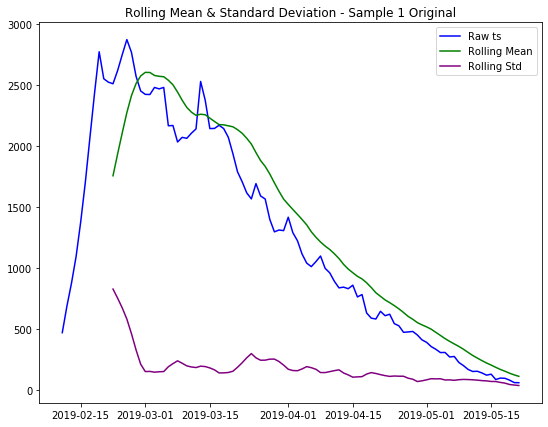

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                 -1.076517
p-value                         0.724345
#Lags Used                      6.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64

Results of KPSS Test:
Test Statistic            0.726913
p-value                   0.011099
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [25]:
test_stationarity(timeseries=train1_col, subtitle='Sample 1 Original')

#### Note

* The original time series is showing 97.5% confidence (trending) stationary in KPSS but not (differencing) stationary in ADF. So we can try to remove the trend to achieve strict stationary.

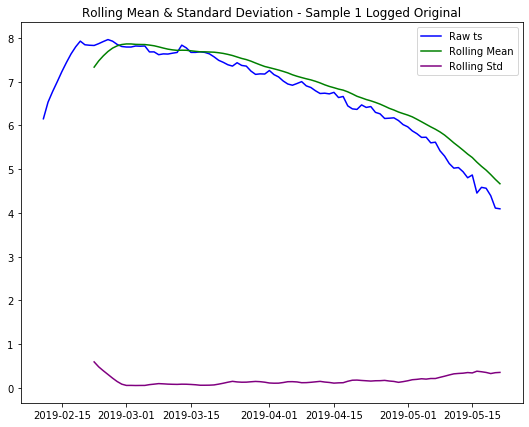

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                  2.889774
p-value                         1.000000
#Lags Used                      6.000000
Number of Observations Used    93.000000
Critical Value (1%)            -3.502705
Critical Value (5%)            -2.893158
Critical Value (10%)           -2.583637
dtype: float64

Results of KPSS Test:
Test Statistic            0.74528
p-value                   0.01000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [26]:
ts_log = np.log(train1_col)
test_stationarity(timeseries=ts_log, subtitle='Sample 1 Logged Original')

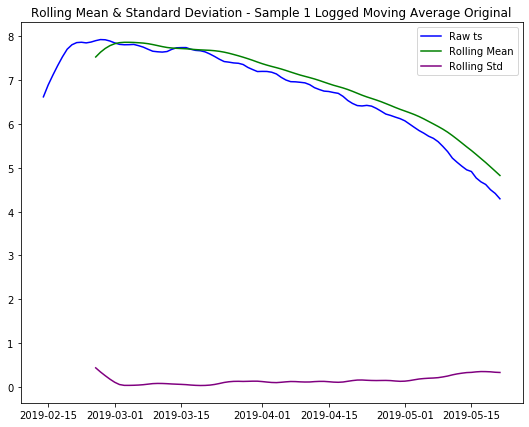

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                  3.581237
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64

Results of KPSS Test:
Test Statistic            0.757153
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [32]:
ts_moving_avg = ts_log.rolling(window=4,center=False).mean().dropna()
test_stationarity(timeseries=ts_moving_avg, subtitle='Sample 1 Logged Moving Average Original')

#### Note

As we can see, when using log, and moving average on logged times series, the trend has been removed further.
* Only use log, we have 90% confidence of (differencing) stationary in ADF, and 99% confidence of (trending) stationary in KPSS.
* After adding moving average on logged time series, we have 99% confidence in both (differencing) stationary and (trending) stationary.
  * The rolling window size matters. Too large or too small won't bring the optimal results.
* Both case can be considered as 90+% confidence of strict stationary. At the same time we can see, the rolling mean still varies over the time, while rolling variance almost stable over the time.


#### Residuals
* Residuals
* Differenced Residuals

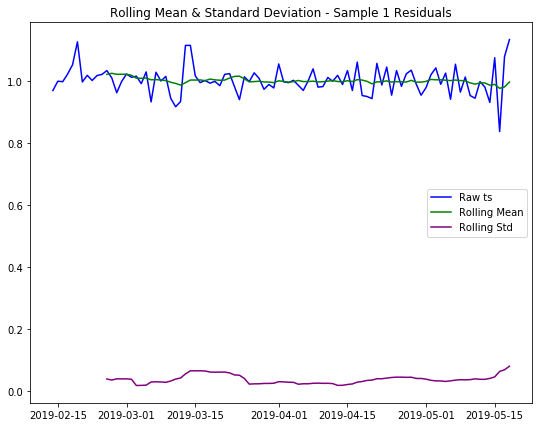

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                -6.658842e+00
p-value                        4.905362e-09
#Lags Used                     2.000000e+00
Number of Observations Used    9.100000e+01
Critical Value (1%)           -3.504343e+00
Critical Value (5%)           -2.893866e+00
Critical Value (10%)          -2.584015e+00
dtype: float64

Results of KPSS Test:
Test Statistic            0.274336
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [36]:
test_stationarity(timeseries=residual1_train, subtitle='Sample 1 Residuals')

#### Note

* For residuals, it's 99% confidence of (differencing) stationary in ADF but it's not (trending) stationary in KPSS. So we can try differencing to see.
* Although the rolling mean, rolling variance here look like more stable than above logged moving average.

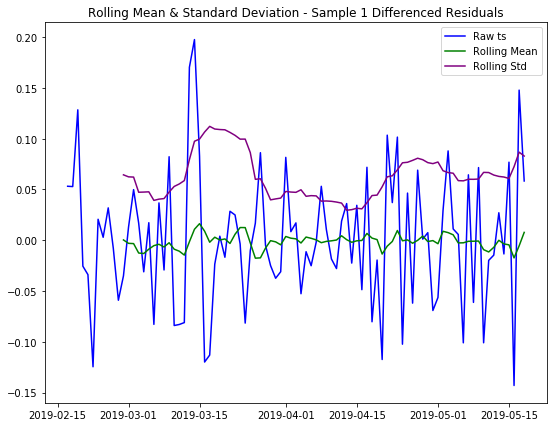

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                 -5.144767
p-value                         0.000011
#Lags Used                      8.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64

Results of KPSS Test:
Test Statistic            0.086602
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [41]:
residuals_diff = residual1_train - residual1_train.shift(3) 
residuals_diff = residuals_diff.dropna()
test_stationarity(timeseries=residuals_diff, subtitle='Sample 1 Differenced Residuals')

#### Note

* Hmm, it seems that applying difference only made it worse.
* I have also tried removing trending & differnecing, didn't work well either.

### Sample 2

#### Original Time Series
* Original time series
* Logged original time series
* Logged moving average original time series

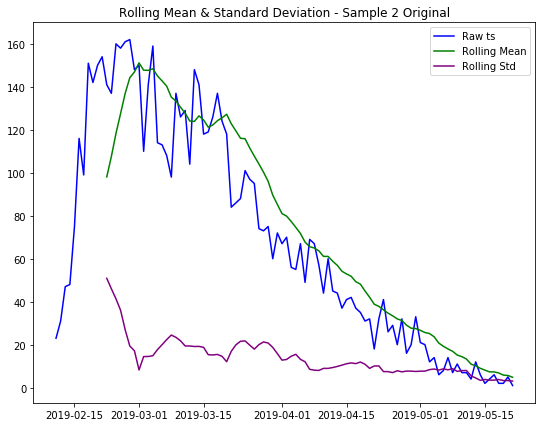

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                 -0.644833
p-value                         0.860527
#Lags Used                      4.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64

Results of KPSS Test:
Test Statistic            0.718798
p-value                   0.011837
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [46]:
test_stationarity(timeseries=train2_col, subtitle='Sample 2 Original')

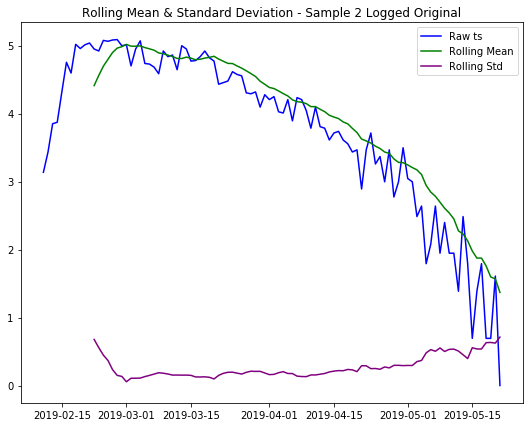

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                  2.678686
p-value                         0.999086
#Lags Used                      7.000000
Number of Observations Used    92.000000
Critical Value (1%)            -3.503515
Critical Value (5%)            -2.893508
Critical Value (10%)           -2.583824
dtype: float64

Results of KPSS Test:
Test Statistic            0.739807
p-value                   0.010000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [47]:
ts_log = np.log(train2_col)
test_stationarity(timeseries=ts_log, subtitle='Sample 2 Logged Original')

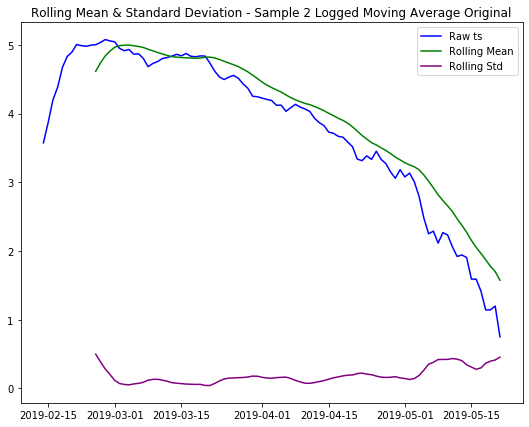

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                  3.582828
p-value                         1.000000
#Lags Used                     12.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64

Results of KPSS Test:
Test Statistic            0.75004
p-value                   0.01000
Lags Used                12.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [48]:
ts_moving_avg = ts_log.rolling(window=4,center=False).mean().dropna()
test_stationarity(timeseries=ts_moving_avg, subtitle='Sample 2 Logged Moving Average Original')

#### Residauls

* Residuals from Additive, Multiplicative methods
* Differenced Residuals from Additive, Multiplicative methods

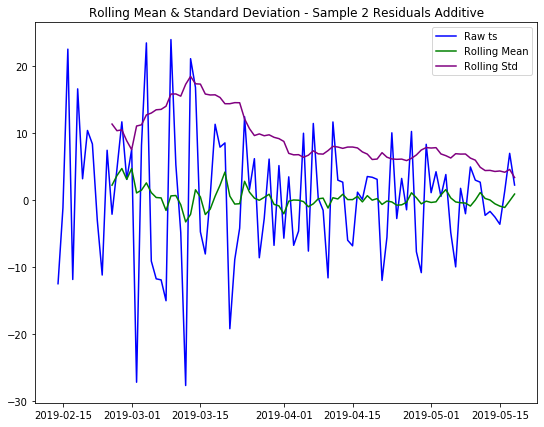

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                -7.728997e+00
p-value                        1.138649e-11
#Lags Used                     3.000000e+00
Number of Observations Used    9.000000e+01
Critical Value (1%)           -3.505190e+00
Critical Value (5%)           -2.894232e+00
Critical Value (10%)          -2.584210e+00
dtype: float64

Results of KPSS Test:
Test Statistic            0.173789
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [49]:
test_stationarity(timeseries=residual2_train_add, subtitle='Sample 2 Residuals Additive')

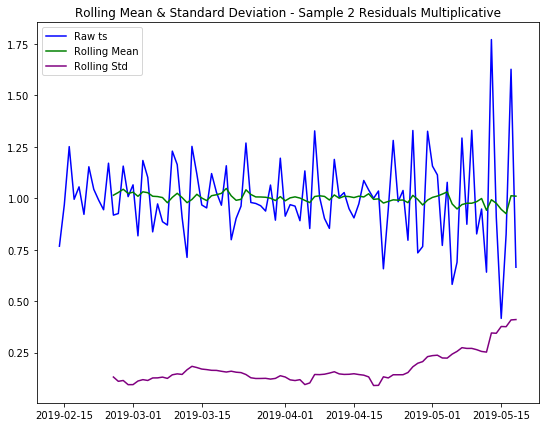

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                 -4.529098
p-value                         0.000174
#Lags Used                      7.000000
Number of Observations Used    86.000000
Critical Value (1%)            -3.508783
Critical Value (5%)            -2.895784
Critical Value (10%)           -2.585038
dtype: float64

Results of KPSS Test:
Test Statistic            0.289138
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [50]:
test_stationarity(timeseries=residual2_train_mulp, subtitle='Sample 2 Residuals Multiplicative')

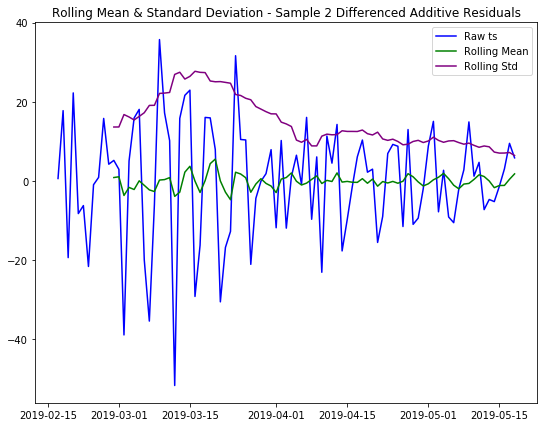

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                -7.562526e+00
p-value                        2.983954e-11
#Lags Used                     5.000000e+00
Number of Observations Used    8.500000e+01
Critical Value (1%)           -3.509736e+00
Critical Value (5%)           -2.896195e+00
Critical Value (10%)          -2.585258e+00
dtype: float64

Results of KPSS Test:
Test Statistic            0.089108
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [51]:
residuals_add_diff = residual2_train_add - residual2_train_add.shift(3) 
residuals_add_diff = residuals_add_diff.dropna()
test_stationarity(timeseries=residuals_add_diff, subtitle='Sample 2 Differenced Additive Residuals')

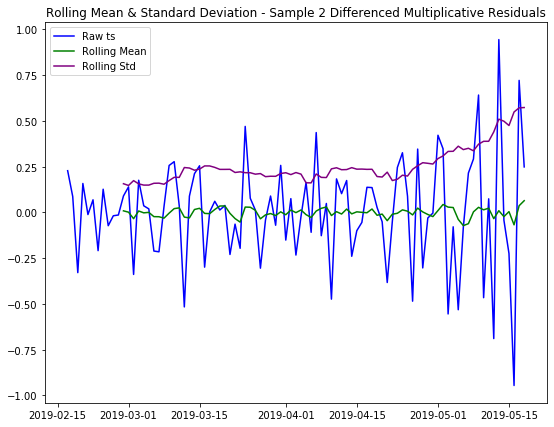

Results of Augmented Dickey-Fuller (ADF) Test:
Test Statistic                 -4.975771
p-value                         0.000025
#Lags Used                     10.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64

Results of KPSS Test:
Test Statistic            0.078008
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [52]:
residuals_mulp_diff = residual2_train_mulp - residual2_train_mulp.shift(3) 
residuals_mulp_diff = residuals_mulp_diff.dropna()
test_stationarity(timeseries=residuals_mulp_diff, subtitle='Sample 2 Differenced Multiplicative Residuals')

## Summary

* Through the stationary analysis on 2 representative samples, using original time series, processed time series, residuals and processed residuals. An easier solution is to use <b>logged moving average of original time series</b>, which is showing 90+% confidence of strict stationary in both samples.
* Rolling mean didn't stay the same over the time and rolling variance is not pure stable either. We can expect the forecasting methods could further capture some trend.